# Capitol 1: Introducere în Analiza Exploratorie a Datelor (EDA)

Bun venit la cursul despre curățarea și pregătirea datelor! În acest capitol, vom explora ce înseamnă **Analiza Exploratorie a Datelor** (Exploratory Data Analysis sau **EDA**) și de ce este un pas fundamental în orice proiect de **Inteligență Artificială** sau **Data Science**.

**EDA** este procesul prin care analizăm seturile de date pentru a le înțelege principalele caracteristici, adesea folosind vizualizări grafice și statistici descriptive. Scopul principal este să descoperim tipare, să identificăm anomalii (cum ar fi valorile lipsă sau atipice) și să formulăm ipoteze care ne vor ghida în etapele următoare de modelare.

## Ciclul de Viață al Analizei de Date

Analiza datelor nu este un proces liniar, ci un ciclu. O putem vizualiza ca pe o serie de pași interconectați:

1.  **Colectarea Datelor**: Obținerea datelor din diverse surse (fișiere CSV, baze de date, API-uri).
2.  **Curățarea Datelor**: Cel mai important și adesea cel mai anevoios pas. Aici tratăm valorile lipsă, corectăm erorile și eliminăm datele irelevante. *Acesta va fi focusul principal al cursului nostru*.
3.  **Analiza (EDA)**: Explorăm datele pentru a înțelege structura și a extrage informații valoroase.
4.  **Interpretarea și Vizualizarea**: Creăm grafice și rapoarte pentru a comunica descoperirile noastre.
5.  **Luarea Deciziilor**: Folosim informațiile obținute pentru a lua decizii informate.


## Pregătirea Mediului de Lucru

Pentru acest curs, vom folosi biblioteca **Pandas**, standardul în Python pentru manipularea datelor. De asemenea, vom folosi **Numpy** pentru operații numerice. Pentru exemplele noastre, vom utiliza un set de date clasic, cel despre pasagerii de pe **Titanic**, care este excelent pentru a exersa tehnicile de curățare, deoarece conține o varietate de probleme (valori lipsă, tipuri de date mixte etc.).

Să începem prin a importa bibliotecile necesare și a încărca setul de date.

In [1]:
# Exemplu 1: Importarea bibliotecilor și încărcarea datelor
import pandas as pd
import numpy as np

# Vom încărca setul de date Titanic. Acesta este disponibil public.
# Vom folosi o legătură directă către fișier pentru a simplifica procesul.
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_titanic = pd.read_csv(url)

# Afișăm primele 5 rânduri pentru a ne familiariza cu datele
print("Primele 5 rânduri din setul de date:")
display(df_titanic.head())

# OBS.: Funcția display() este specifică mediilor Jupyter/Colab și afișează
# DataFrame-urile într-un format tabelar, mai lizibil decât print().

Primele 5 rânduri din setul de date:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


___

# Capitol 2: Curățarea Datelor - Valori Lipsă (Missing Data)

Datele din lumea reală sunt rareori perfecte. Una dintre cele mai comune probleme este prezența **valorilor lipsă** (missing values). Acestea pot apărea din diverse motive: erori la introducerea datelor, informații care nu au fost disponibile sau pur și simplu date pierdute în timpul procesării.

În **Pandas**, valorile lipsă sunt de obicei reprezentate prin `NaN` (Not a Number).

## Identificarea Valorilor Lipsă

Primul pas în tratarea valorilor lipsă este să le identificăm. Trebuie să știm *câte* valori lipsă avem și *unde* se află acestea. Metoda `.isna()` (sau `.isnull()`) combinată cu `.sum()` este perfectă pentru acest scop.

In [2]:
# Exemplu 1: Identificarea valorilor lipsă

# Folosim .isna() pentru a crea o mască booleană (True/False)
# Apoi, .sum() adună toate valorile True (care sunt tratate ca 1)
valori_lipsa = df_titanic.isna().sum()

print("Numărul de valori lipsă pe fiecare coloană:")
print(valori_lipsa)

# OBS.: Observăm că coloanele 'Age', 'Cabin' și 'Embarked' au valori lipsă.
# 'Cabin' are un număr foarte mare de valori lipsă (687 din 891), ceea ce
# sugerează că această coloană ar putea fi dificilă de utilizat.

Numărul de valori lipsă pe fiecare coloană:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# __EXERCIȚIU__
# Calculați și afișați procentul de valori lipsă pentru fiecare coloană din
# setul de date `df_titanic`.

# [!] Numărul total de rânduri poate fi obținut cu `len(df_titanic)`.

numar_intrari = len(df_titanic)

procente_lipsa = (valori_lipsa / numar_intrari) * 100

print(procente_lipsa)


# HINT: Puteți împărți numărul de valori lipsă (calculat mai sus) la numărul
# total de rânduri din DataFrame și apoi înmulțiți cu 100 pentru a afla
# procentajul.

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


## Tratarea Valorilor Lipsă

Există două abordări principale pentru a trata valorile lipsă:

1.  **Ștergerea (Deletion)**: Eliminăm rândurile sau coloanele care conțin valori lipsă. Aceasta este o soluție rapidă, dar poate duce la pierderea de informații valoroase.
    * `df.dropna(axis=0)`: Șterge rândurile cu valori lipsă.
    * `df.dropna(axis=1)`: Șterge coloanele cu valori lipsă.

2.  **Imputarea (Imputation)**: Completăm valorile lipsă cu o valoare estimată. Aceasta este adesea o abordare mai bună, deoarece păstrează datele.
    * `df.fillna(value)`: Înlocuiește valorile `NaN` cu valoarea specificată.

Alegerea metodei depinde de context: cât de multe date lipsesc și care este importanța acelor date.

In [4]:
# Exemplu 2: Ștergerea coloanelor cu prea multe valori lipsă

# Deoarece coloana 'Cabin' are peste 75% valori lipsă, este un candidat bun
# pentru a fi ștearsă.
df_fara_cabin = df_titanic.drop(columns=['Cabin'])

print("Setul de date după ștergerea coloanei 'Cabin':")
display(df_fara_cabin.head())
print("Numărul de coloane rămase:", len(df_fara_cabin.columns))


# OBS.: Metoda .drop() este folosită pentru a elimina rânduri sau coloane.
# Parametrul 'columns' specifică o listă de coloane de șters. La fel ca
# majoritatea metodelor Pandas, .drop() returnează un nou DataFrame,
# lăsându-l pe cel original nemodificat.

Setul de date după ștergerea coloanei 'Cabin':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Numărul de coloane rămase: 11


In [ ]:
# __EXERCIȚIU__
# Creați un nou DataFrame numit `df_randuri_curate` prin ștergerea tuturor
# RÂNDURILOR care au valori lipsă din `df_fara_cabin`.
# Afișați câte rânduri au rămas.




# HINT: Ne amintim de metoda .dropna() de la un curs anterior.

In [5]:
# Exemplu 3: Înlocuirea valorilor lipsă numerice cu media

# Pentru coloana 'Age', o strategie bună este să înlocuim valorile lipsă cu
# vârsta medie a tuturor pasagerilor.
varsta_medie = df_titanic['Age'].mean()
print(f"Vârsta medie este: {varsta_medie:.2f}")

# Creăm o copie pentru a nu modifica DataFrame-ul original
df_inlocuire = df_titanic.copy()

# Folosim .fillna() pentru a completa valorile NaN din coloana 'Age'
# df_inlocuire['Age'].fillna(varsta_medie, inplace=True)
df_inlocuire['Age'] = df_inlocuire['Age'].fillna(varsta_medie)

print("\nNumărul de valori lipsă în 'Age' după imputare:")
print(df_inlocuire['Age'].isna().sum())


# OBS.:  Parametrul `inplace=True` din .fillna() modifică DataFrame-ul direct,
# fără a mai fi nevoie de o asignare (ex: df = df.fillna(...)). Acest parametru
# este considerat 'depricated' în versiuni mai noi ale Pandas, deci nu este
# recomandat.

Vârsta medie este: 29.70

Numărul de valori lipsă în 'Age' după imputare:
0


In [6]:
# Exemplu 4: Înlocuirea valorilor lipsă categorice cu modul

# Pentru coloana 'Embarked' (portul de îmbarcare), care este categorică, cea
# mai bună strategie este să folosim cea mai frecventă valoare (modul).
port_moda = df_inlocuire['Embarked'].mode()[0]
print(f"Cel mai frecvent port de îmbarcare este: {port_moda}")

df_inlocuire['Embarked'] = df_inlocuire['Embarked'].fillna(port_moda)

print("\nNumărul de valori lipsă în 'Embarked' după înlocuire:")
print(df_inlocuire['Embarked'].isna().sum())

# OBS.: Metoda .mode() returnează o Serie, deoarece pot exista mai multe valori
# cu aceeași frecvență maximă. De aceea, accesăm primul element cu [0].

Cel mai frecvent port de îmbarcare este: S

Numărul de valori lipsă în 'Embarked' după înlocuire:
0


In [12]:
# __EXERCIȚIU__
# În loc de medie, completați valorile lipsă din coloana 'Age' a DataFrame-ului
# original (`df_titanic`) folosind mediana. Stocați rezultatul într-un nou
# DataFrame numit `df_varsta_mediana`.
# Afișați numărul de valori lipsă pentru 'Age' înainte și după imputare.

# [!] Mediana se calculează cu metoda .median().

df_varsta_mediana = df_titanic.copy()

print(df_varsta_mediana["Age"].isna().sum())

varsta_mediana = df_varsta_mediana["Age"].median()
print(varsta_mediana)

df_varsta_mediana["Age"] = df_varsta_mediana["Age"].fillna(varsta_mediana)
df_varsta_mediana.head(10)

print(df_varsta_mediana["Age"].isna().sum())

177
28.0
0


___

# Capitol 3: Tratarea Valorilor Atipice (Outliers)

**Valorile atipice** (sau **outliers**) sunt observații care se abat semnificativ de la restul datelor. Gândiți-vă la ele ca la niște puncte de date care sunt *mult prea mari* sau *mult prea mici* în comparație cu majoritatea. Acestea pot distorsiona rezultatele statistice (cum ar fi media) și pot afecta performanța modelelor de Machine Learning.

## Detectarea Valorilor Atipice

Există mai multe metode pentru a detecta valorile atipice. Două dintre cele mai comune metode statistice sunt:

1.  **Regula Deviației Standard**: Orice punct de date care se află la mai mult de 2 sau 3 deviații standard față de medie este considerat un outlier.
2.  **Intervalul Interquartilic (IQR)**: Metoda se bazează pe quartile. Un outlier este definit ca orice valoare care se află în afara intervalului `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`.

Limita inferioară (3 dev. std.): -116.88
Limita superioară (3 dev. std.): 181.28

Numărul de valori atipice găsite: 20


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C


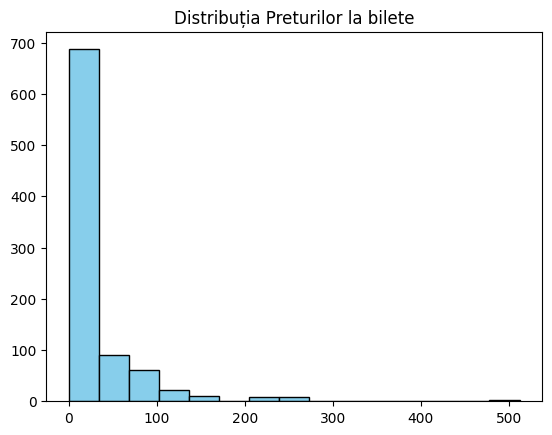

In [14]:
# Exemplu 1: Detectarea outlier-ilor folosind Deviația Standard

# Vom analiza coloana 'Fare' (prețul biletului) din setul de date curățat
# (df_inlocuire, dar vom elimina mai întâi coloana 'Cabin')
df_curat = df_inlocuire.drop(columns=['Cabin'])

media_pret = df_curat['Fare'].mean()
dev_std_pret = df_curat['Fare'].std()
factor = 3

limita_superioara = media_pret + dev_std_pret * factor
limita_inferioara = media_pret - dev_std_pret * factor

print(f"Limita inferioară (3 dev. std.): {limita_inferioara:.2f}")
print(f"Limita superioară (3 dev. std.): {limita_superioara:.2f}")

# Găsim outlier-ii
outliers = df_curat[(df_curat['Fare'] > limita_superioara) | (df_curat['Fare'] < limita_inferioara)]

print(f"\nNumărul de valori atipice găsite: {len(outliers)}")
display(outliers.head())

import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.hist(df_curat["Fare"], bins=15, color='skyblue', edgecolor='black')

ax.set_title("Distribuția Preturilor la bilete")
plt.show()


# OBS.: Am folosit operatorul logic `|` (SAU) pentru a combina cele două condiții.
# O valoare este atipică dacă este fie mai mare decât limita superioară, fie mai
# mică decât cea inferioară (deși în cazul prețurilor, valorile negative nu sunt
# posibile).

## Tratarea Valorilor Atipice

Odată detectate, avem două opțiuni principale:

1.  **Ștergerea (Removal)**: Eliminăm rândurile care conțin valorile atipice. Aceasta este o soluție simplă, dar trebuie folosită cu prudență, mai ales dacă avem un set de date mic.
2.  **Limitarea (Capping)**: Înlocuim valorile atipice cu cea mai apropiată valoare "normală" (de obicei, limita superioară sau inferioară a intervalului considerat normal). Aceasta păstrează datele și reduce impactul outlier-ilor.

Dimensiunea originală: (891, 11)
Dimensiunea după eliminarea outlier-ilor: (871, 11)


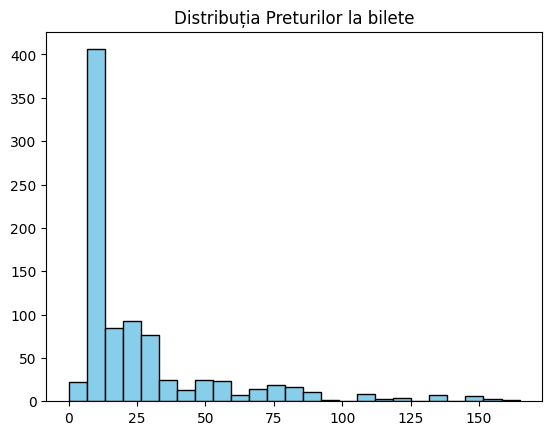

In [19]:
# Exemplu 2: Ștergerea outlier-ilor

# Creăm un DataFrame nou care conține doar valorile considerate normale
df_fara_outliers = df_curat[(df_curat['Fare'] <= limita_superioara) & (df_curat['Fare'] >= limita_inferioara)]

print(f"Dimensiunea originală: {df_curat.shape}")
print(f"Dimensiunea după eliminarea outlier-ilor: {df_fara_outliers.shape}")

fig, ax = plt.subplots()

ax.hist(df_fara_outliers["Fare"], bins=25, color='skyblue', edgecolor='black')

ax.set_title("Distribuția Preturilor la bilete")
plt.show()




# OBS.: Operatorul `&` (ȘI) este folosit pentru a ne asigura că valorile păstrate
# îndeplinesc ambele condiții: sunt mai mici sau egale cu limita superioară ȘI
# mai mari sau egale cu limita inferioară.

Limita superioară (percentila 95): 112.08
Limita inferioară (percentila 5): 7.22

Valoarea maximă a prețului înainte de limitare: 512.33
Valoarea maximă a prețului după limitare: 112.08


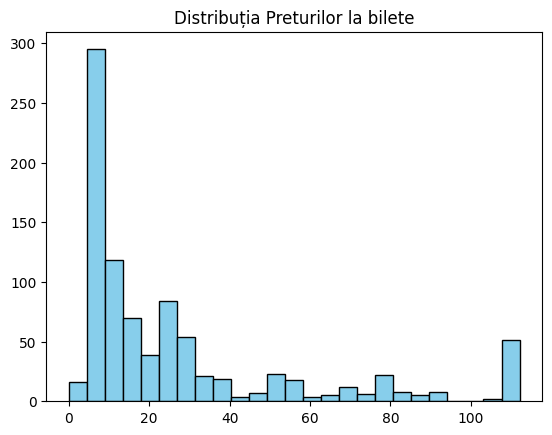

In [20]:
# Exemplu 3: Limitarea (Capping) outlier-ilor folosind percentile

# O altă metodă robustă este folosirea percentilelor. De exemplu, putem decide
# că orice valoare peste percentila 95 este un outlier și o vom limita la acea
# valoare.
limita_superioara_perc = df_curat['Fare'].quantile(0.95)
limita_inferioara_perc = df_curat['Fare'].quantile(0.05)

print(f"Limita superioară (percentila 95): {limita_superioara_perc:.2f}")
print(f"Limita inferioară (percentila 5): {limita_inferioara_perc:.2f}")

# Creăm o copie pentru a lucra pe ea
df_limitat = df_curat.copy()

# Folosim np.where pentru a înlocui valorile
df_limitat['Fare'] = np.where(
    df_limitat['Fare'] > limita_superioara_perc, # Condiția
    limita_superioara_perc,                     # Valoarea dacă e True
    df_limitat['Fare']                          # Valoarea dacă e False
)

print(f"\nValoarea maximă a prețului înainte de limitare: {df_curat['Fare'].max():.2f}")
print(f"Valoarea maximă a prețului după limitare: {df_limitat['Fare'].max():.2f}")

# OBS.: Funcția `np.where` este foarte utilă. Funcționează ca un `if-else` vectorial:
# `np.where(condiție, valoare_dacă_adevărat, valoare_dacă_fals)`.

fig, ax = plt.subplots()

ax.hist(df_limitat["Fare"], bins=25, color='skyblue', edgecolor='black')

ax.set_title("Distribuția Preturilor la bilete")
plt.show()

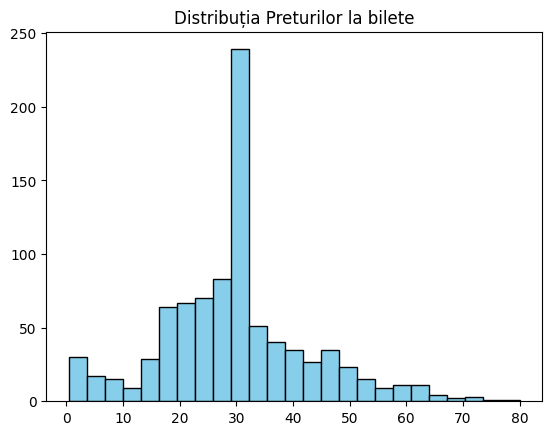

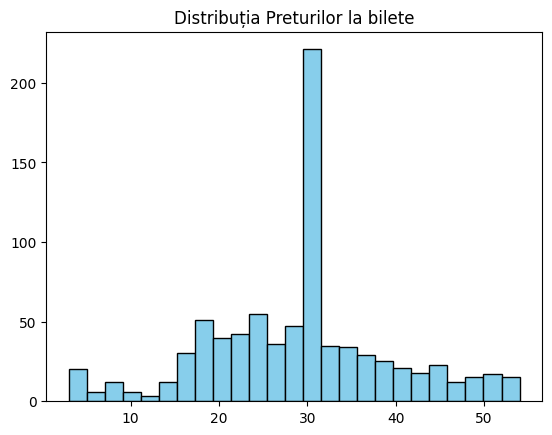

In [21]:
# __EXERCIȚIU__
# Detectați și eliminați valorile atipice din coloana 'Age' a DataFrame-ului
# `df_inlocuire` folosind metoda intervalului interquartilic (IQR).

# Un outlier este orice valoare în afara [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

# Afișați numărul de rânduri înainte și după eliminare.

# [!] Q1 este df['Age'].quantile(0.25)
# [!] Q3 este df['Age'].quantile(0.75)
# IQR = Q3 - Q1.

q1 = df_inlocuire["Age"].quantile(0.25) # -> Cuartila 1 (Q1)
q3 = df_inlocuire["Age"].quantile(0.75) # -> Cuartila 3 (Q3)

iqr = q3 - q1

limita_inferioara = q1 - 1.5 * iqr
limita_superioara = q3 + 1.5 * iqr


fig, ax = plt.subplots()

ax.hist(df_inlocuire["Age"], bins=25, color='skyblue', edgecolor='black')

ax.set_title("Distribuția Preturilor la bilete")
plt.show()

df_fara_outliers_varsta = df_inlocuire[(df_inlocuire["Age"]>limita_inferioara)& (df_inlocuire["Age"]<limita_superioara)]

fig, ax = plt.subplots()

ax.hist(df_fara_outliers_varsta["Age"], bins=25, color='skyblue', edgecolor='black')

ax.set_title("Distribuția Preturilor la bilete")
plt.show()


___

# Capitol 4: Transformarea și Scalarea Datelor

După ce am curățat datele, următorul pas este să le transformăm într-un format adecvat pentru analiză sau pentru modelele de Machine Learning. Mulți algoritmi funcționează mai bine atunci când datele numerice au o anumită distribuție sau se află pe aceeași scară.

## Scalarea Datelor (Data Scaling)

Scalarea este procesul de a aduce toate caracteristicile numerice la o scară comună, fără a distorsiona diferențele dintre valori. Este crucială pentru algoritmii bazați pe distanță (ex: K-NN, K-Means).

1.  **Normalizarea (Min-Max Scaling)**: Transformă datele pentru a se încadra într-un interval fix, de obicei [0, 1]. Formula este: $$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
2.  **Standardizarea (Z-score Normalization)**: Transformă datele astfel încât să aibă o medie de 0 și o deviație standard de 1. Formula este: $$X_{std} = \frac{X - \mu}{\sigma}$$

In [22]:
# Exemplu 1: Normalizarea Min-Max

# Vom normaliza coloana 'Age' din DataFrame-ul curățat (df_fara_outliers)
df_scalare = df_fara_outliers.copy()

varsta_min = df_scalare['Age'].min()
varsta_max = df_scalare['Age'].max()

df_scalare['Age_Normalized'] = (df_scalare['Age'] - varsta_min) / (varsta_max - varsta_min)

print("Descrierea coloanei 'Age' normalizate:")
display(df_scalare[['Age', 'Age_Normalized']].describe())

# OBS.: După normalizare, valoarea minimă a coloanei 'Age_Normalized' este 0,
# iar cea maximă este 1, exact cum ne așteptam.

Descrierea coloanei 'Age' normalizate:


,Age,Age_Normalized
count,871.000000,871.000000
mean,29.668789,0.367539
std,13.024141,0.163661
min,0.420000,0.000000
25%,22.000000,0.271174
50%,29.699118,0.367921
75%,35.000000,0.434531
max,80.000000,1.000000


In [23]:
# Exemplu 2: Standardizarea Z-score

# Vom standardiza coloana 'Fare'
pret_mediu = df_scalare['Fare'].mean()
pret_dev_std = df_scalare['Fare'].std()

df_scalare['Fare_Standardized'] = (df_scalare['Fare'] - pret_mediu) / pret_dev_std

print("Descrierea coloanei 'Fare' standardizate:")
display(df_scalare[['Fare', 'Fare_Standardized']].describe())

# OBS.: După standardizare, media coloanei 'Fare_Standardized' este foarte
# apropiată de 0 (ex: 1.8e-17), iar deviația standard este 1.

# Folosim .describe() pentru a vedea o versiune condensată a tuturor
# statisticilor necesare pentru descrierea unui set de date.

Descrierea coloanei 'Fare' standardizate:


,Fare,Fare_Standardized
count,871.000000,8.710000e+02
mean,26.530170,-1.162484e-16
std,29.351184,1.000000e+00
min,0.000000,-9.038876e-01
25%,7.895800,-6.348763e-01
50%,13.862500,-4.315898e-01
75%,30.000000,1.182177e-01
max,164.866700,4.713150e+00


In [ ]:
# __EXERCIȚIU__
# Standardizați coloana 'Age' din `df_fara_outliers` și adăugați-o ca o nouă
# coloană numită 'Age_Standardized'.
# Afișați primele 5 rânduri ale DataFrame-ului cu noua coloană.

## Discretizarea (Binning)

**Discretizarea** este procesul de a transforma o variabilă numerică continuă într-una categorică (discretă). Acest lucru este util pentru a simplifica modelele sau pentru a grupa datele în intervale logice.

De exemplu, în loc să lucrăm cu vârsta exactă, am putea grupa pasagerii în categorii precum 'Copil', 'Adult', 'Vârstnic'.

In [24]:
# Exemplu 3: Discretizarea coloanei 'Age'

# Vom folosi DataFrame-ul cu vârstele imputate: df_imputat
df_discret = df_inlocuire.copy()

# Definim limitele intervalelor (bins)
limite = [0, 12, 18, 60, 100]
# Definim etichetele pentru fiecare interval
etichete = ['Copil', 'Adolescent', 'Adult', 'Vârstnic']

# Folosim funcția pd.cut pentru a crea noua coloană
df_discret['Categorie_Varsta'] = pd.cut(df_discret['Age'], bins=limite, labels=etichete, right=False)

print("Distribuția pe categorii de vârstă:")
print(df_discret['Categorie_Varsta'].value_counts())

# OBS.: `pd.cut` este funcția ideală pentru acest scop. `bins` definește
# marginile intervalelor, iar `labels` le denumește.
# `right=False` înseamnă că intervalul este de forma [start, stop), adică
# include capătul din stânga, dar îl exclude pe cel din dreapta.

Distribuția pe categorii de vârstă:
Categorie_Varsta
Adult         752
Copil          68
Adolescent     45
Vârstnic       26
Name: count, dtype: int64


In [ ]:
# __EXERCIȚIU__
# Discretizați coloana 'Fare' din `df_inlocuire` în 4 categorii de preț,
# folosind quartilele. Categoriile vor fi: 'Foarte Ieftin', 'Ieftin', 'Scump',
# 'Foarte Scump'. Adăugați rezultatul într-o nouă coloană 'Categorie_Pret'.


# HINT: Puteți folosi metoda .describe() pentru a determina valorile quartilelor.

___

In [ ]:
# Exemplu 4: Variantă alternativă
# Putem folosi `pd.qcut()` pentru a realiza obiectivul de la exercițiul
# anterior, care împarte datele în intervale de dimensiuni egale
# (bazate pe quantile).

df_discret['Fare'] = pd.qcut(df_discret['Fare'], q=4, labels=['Foarte Ieftin', 'Ieftin', 'Scump', 'Foarte Scump'])

print(df_discret['Fare'].value_counts())

# Capitol 5 [Recapitulare]: Gruparea și Agregarea Datelor

**Gruparea** și **agregarea** sunt tehnici puternice care ne permit să sumarizăm datele. Procesul implică trei pași, cunoscuți ca **Split-Apply-Combine**:

1.  **Split (Împărțire)**: Setul de date este împărțit în grupuri pe baza unei sau mai multor chei.
2.  **Apply (Aplicare)**: O funcție de agregare (ex: `sum()`, `mean()`, `count()`) este aplicată pe fiecare grup în parte.
3.  **Combine (Combinare)**: Rezultatele sunt combinate într-o nouă structură de date.

În Pandas, acest proces este realizat elegant cu metoda `.groupby()`.

In [25]:
# Exemplu 1: Gruparea după o singură coloană

# Să calculăm rata medie de supraviețuire pentru fiecare sex.
rata_supravietuire_sex = df_titanic.groupby('Sex')['Survived'].mean()

print("Rata medie de supraviețuire în funcție de sex:")
print(rata_supravietuire_sex)

Rata medie de supraviețuire în funcție de sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [ ]:
# __EXERCIȚIU__
# Calculați vârsta medie a pasagerilor pentru fiecare clasă de bilet ('Pclass').

In [26]:
# Exemplu 2: Gruparea după mai multe coloane

# Să vedem prețul mediu al biletului ('Fare') pentru fiecare clasă ('Pclass')
# ȘI pentru fiecare port de îmbarcare ('Embarked').

pret_mediu_detaliat = df_titanic.groupby(['Pclass', 'Embarked'])['Fare'].mean()

print("Prețul mediu al biletului pe clasă și port de îmbarcare:")
print(pret_mediu_detaliat)

# OBS.: Când grupăm după mai multe coloane, rezultatul este o Serie cu un
# MultiIndex. Acesta este un index ierarhic, util pentru a reprezenta
# date multidimensionale.

Prețul mediu al biletului pe clasă și port de îmbarcare:
Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64


In [ ]:
# __EXERCIȚIU__
# Calculați rata de supraviețuire pentru fiecare combinație de sex ('Sex') și
# clasă de bilet ('Pclass').
# Care grup a avut cea mai mare rată de supraviețuire?

In [ ]:
# Exemplu 3: Agregare cu funcții multiple

# Putem aplica mai multe funcții de agregare simultan folosind metoda .agg().
# Să calculăm vârsta medie și numărul de pasageri pentru fiecare clasă.
agregare_varsta = df_titanic.groupby('Pclass')['Age'].agg(['mean', 'count'])

print("Statistici de vârstă pe fiecare clasă:")
display(agregare_varsta)

In [ ]:
# __EXERCIȚIU__
# Pentru fiecare port de îmbarcare ('Embarked'), calculați prețul mediu al
# biletului ('Fare') și numărul total de supraviețuitori ('Survived').

# [!] Putem folosi .agg() cu un dicționar, pentru diferite statistici pentru
# coloane diferite:
# `df.groupby(...).agg({'Fare': 'mean', 'Survived': 'sum'})`.

___

# Capitol 6: Ingineria Caracteristicilor (Feature Engineering)

**Ingineria Caracteristicilor** este procesul de a crea noi variabile (caracteristici sau *features*) din datele existente, pentru a îmbunătăți performanța modelelor de Machine Learning. Este considerată mai mult o artă decât o știință și se bazează pe înțelegerea datelor și a domeniului de activitate.

În acest capitol, vom explora câteva tehnici de bază pentru a extrage informații valoroase din coloanele de tip text și dată.

## Extragerea de Informații din Text

Coloanele textuale pot ascunde informații structurate. De exemplu, din numele unei persoane, am putea extrage titlul (Mr., Mrs., Miss), care ne-ar putea oferi indicii despre statutul social sau sex.

In [ ]:
# Exemplu 1: Extragerea titlului din coloana 'Name'
df_feat = df_titanic.copy()

# Folosim accesorul .str și expresii regulate pentru a extrage titlul
# O expresie regulată este un șir de caractere care definește un tipar de căutare
df_feat['Title'] = df_feat['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("Titlurile extrase și frecvența lor:")
print(df_feat['Title'].value_counts())

# OBS.: Accesorul `.str` din Pandas ne permite să aplicăm metode de string-uri
# pe fiecare element al unei Serii. Metoda `.str.extract()` caută un tipar
# (pattern) și extrage grupul corespunzător. Aici, ' ([A-Za-z]+)\.' caută
# un spațiu, urmat de unul sau mai multe caractere alfabetice, urmate de un punct.

## Lucrul cu Date Calendaristice

Dacă avem o coloană cu date calendaristice (timestamps), o putem transforma într-un tip de date special (`datetime`) pentru a extrage cu ușurință componente precum anul, luna, ziua săptămânii etc. Aceste noi caracteristici pot fi foarte predictive.

Deși setul de date Titanic nu are o coloană de tip dată, vom crea una artificial pentru a demonstra conceptul.

In [ ]:
# Exemplu 2: Crearea și prelucrarea unei coloane de tip dată

# Creăm un DataFrame demonstrativ
data = pd.DataFrame({
    'data_tranzactie': ['2024-01-15', '2024-02-20', '2024-03-08', '2024-04-30']
})

# Convertim coloana la formatul datetime
data['data_tranzactie'] = pd.to_datetime(data['data_tranzactie'])

# Extragem componentele
data['luna'] = data['data_tranzactie'].dt.month
data['ziua_saptamanii'] = data['data_tranzactie'].dt.day_name()
data['saptamana_din_an'] = data['data_tranzactie'].dt.isocalendar().week

print("DataFrame cu caracteristici extrase din dată:")
display(data)

# OBS.: Funcția `pd.to_datetime` este esențială pentru a converti string-urile
# în obiecte `datetime`. Odată convertite, putem folosi accesorul `.dt`
# pentru a accesa o multitudine de atribute (year, month, day, dayofweek etc.).

In [ ]:
# __EXERCIȚIU__
# Se dă următorul DataFrame cu date de naștere:
date_nastere = pd.DataFrame({
    'nume': ['Ana', 'Bogdan', 'Clara'],
    'data_nasterii': ['05-03-1990', '12-11-1985', '21-07-2001']
})
# 1. Convertiți coloana 'data_nasterii' la formatul datetime.
#    (Atenție la formatul 'DD-MM-YYYY' - folosiți `format='%d-%m-%Y'` ca
#     parametru pentru to_datetime()).
# 2. Extrageți anul nașterii într-o nouă coloană numită 'anul_nasterii'.
# 3. Afișați DataFrame-ul final.





# HINT: Pentru a extrage anul, aplicăm aceeași logică ca la .dt.month
#  (`.dt.year`).